In [124]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [125]:
#acquire the data

# Load data
data = pd.read_csv('listings.csv',sep=',')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9147025,https://www.airbnb.com/rooms/9147025,20160601225828,2016-06-02,Cozy City Island Cottage,City Island is a small community at the edge o...,This cozy little cottage is an open floor plan...,City Island is a small community at the edge o...,none,City Island is famous for it's seafood restaur...,NaN,City Island is a walkable Island. Everything i...,This is a whole private house on a charming qu...,I live close by and know the area well if you ...,No Smoking,https://a2.muscache.com/im/pictures/4e308401-5...,https://a2.muscache.com/im/pictures/4e308401-5...,https://a2.muscache.com/im/pictures/4e308401-5...,https://a2.muscache.com/im/pictures/4e308401-5...,403032,https://www.airbnb.com/users/show/403032,Diane,2011-02-21,"New York, New York, United States",NaN,within a few hours,100%,80%,f,https://a2.muscache.com/im/pictures/dc275952-e...,https://a2.muscache.com/im/pictures/dc275952-e...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Carroll Street, Bronx, NY 10464, United States",NaN,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.844870,-73.789541,f,House,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",NaN,$95.00,$550.00,NaN,$500.00,$30.00,1,$0.00,1,1125,6 weeks ago,NaN,1,25,25,208,2016-06-02,9,2015-12-26,2016-04-24,91.0,9.0,9.0,9.0,9.0,10.0,9.0,f,NaN,NaN,f,moderate,f,f,1,1.69
1,6627449,https://www.airbnb.com/rooms/6627449,20160601225828,2016-06-02,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,There is off street parking in the apartment c...,We are (2) blocks from the BX29 bus which you ...,The entire apartment is available as I am only...,My daughter and her family live on the Island ...,There is no smoking and no pets. Otherwise us...,https://a0.muscache.com/im/pictures/83539171/1...,https://a0.muscache.com/im/pictures/83539171/1...,https://a0.muscache.com/im/pictures/83539171/1...,https://a0.muscache.com/im/pictures/83539171/1...,13886510,https://www.airbnb.com/users/show/13886510,Arlene,2014-04-04,"Los Angeles, California, United States",NaN,within a few hours,100%,100%,f,https://a1.muscache.com/im/users/13886510/prof...,https://a1.muscache.com/im/users/13886510/prof...,City Island,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"B Tier St, City Island, NY 10464, United States",City Island,City Island,Bronx,City Island,NY,10464,New York,"City Island,

In [126]:
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 100)

In [127]:
def wrangler(data):
    data = data.drop(['access','calendar_last_scraped','calendar_updated','city',
'cleaning_fee','description','experiences_offered','first_review','has_availability',
'host_about','host_identity_verified', 'host_location','host_name',
'host_neighbourhood','host_picture_url', 'host_response_time',
'host_thumbnail_url','host_url','host_verifications','house_rules','interaction',
'jurisdiction_names','last_review','last_scraped','license','listing_url','medium_url','monthly_price',
'name','neighborhood_overview','neighbourhood','notes','picture_url',
'require_guest_phone_verification','require_guest_profile_picture','requires_license',
'review_scores_accuracy','review_scores_checkin','review_scores_cleanliness',
'review_scores_communication','review_scores_location','review_scores_rating',
'review_scores_value','reviews_per_month','scrape_id','security_deposit','space',
'square_feet','state','street','summary','thumbnail_url','transit','weekly_price',
'xl_picture_url'], axis=1)
    
    return data

In [128]:
data = wrangler(data)

In [129]:
# Processing room_type
#will work for Series with unique strings that are less than 1,000

# Get list of all unique values
room = sorted(set(data['room_type']))

# Create dictionary mapping each unique value to a numeric value
room_type_dict = {}
for v, k in enumerate(room):
    room_type_dict[k] = v

# Replace using dictionary
data = data.replace({'room_type': room_type_dict})

In [130]:
# Processing zipcode
#will work for Series with unique strings that are less than 1,000

# Get list of all unique values
zip = sorted(set(data['zipcode']))

# Create dictionary mapping each unique value to a numeric value
zipcode_dict = {}
for v, k in enumerate(zip):
    zipcode_dict[k] = v

# Replace using dictionary
data = data.replace({'zipcode': zipcode_dict})

In [131]:
# Processing neighbourhood_cleansed
#will work for Series with unique strings that are less than 1,000

# Get list of all unique values
neighbourhood = sorted(set(data['neighbourhood_cleansed']))

# Create dictionary mapping each unique value to a numeric value
neighbourhood_cleansed_dict = {}
for v, k in enumerate(neighbourhood):
    neighbourhood_cleansed_dict[k] = v

# Replace using dictionary
data = data.replace({'neighbourhood_cleansed': neighbourhood_cleansed_dict})

In [132]:
# Processing host_acceptance_rate
#will work for Series with unique strings that are less than 1,000

# Get list of all unique values
acceptance_rate = sorted(set(data['host_acceptance_rate']))

# Create dictionary mapping each unique value to a numeric value
host_acceptance_rate_dict = {}
for v, k in enumerate(acceptance_rate):
    host_acceptance_rate_dict[k] = v

# Replace using dictionary
data = data.replace({'host_acceptance_rate': host_acceptance_rate_dict})



In [133]:
#Processing host_response_rate
#will work for Series with unique strings that are less than 1,000

resp_rate = sorted(set(data['host_response_rate']))

# Create dictionary mapping each unique value to a numeric value

resp_rate_dict = {}
for v, k in enumerate(resp_rate):
    resp_rate_dict[k] = v
    
# Replace using dictionary
data = data.replace({'host_response_rate': resp_rate_dict})



In [134]:
# Processing cancellation_policy
#will work for Series with unique strings that are less than 1,000

# Get list of all unique values
cancellation = sorted(set(data['cancellation_policy']))

# Create dictionary mapping each unique value to a numeric value
cancellation_policy_dict = {}
for v, k in enumerate(cancellation):
    cancellation_policy_dict[k] = v

# Replace using dictionary
data = data.replace({'cancellation_policy': cancellation_policy_dict})

In [135]:
# Processing property_type
#will work for Series with unique strings that are less than 1,000

# Get list of all unique values
u = sorted(set(data['property_type']))

# Create dictionary mapping each unique value to a numeric value
property_type_dict = {}
for v, k in enumerate(u):
    property_type_dict[k] = v

# Replace using dictionary
data = data.replace({'property_type': property_type_dict})

In [136]:
# Get counts for missing values in each column
missing_values = data.isnull().sum()
# # Get columns with too many missing values (more than 40%)
colums_with_too_many_missing_values = list(missing_values[missing_values > len(data)*0.2].index)

print colums_with_too_many_missing_values

[]


In [137]:
data.dropna(how='any').shape

(35472, 40)

In [138]:
'''['id','host_id','host_acceptance_rate',
       'host_is_superhost','host_listings_count',
       'host_total_listings_count','neighbourhood_cleansed','zipcode',
       'latitude','is_location_exact',
       'longitude','property_type','room_type',
       'accommodates','bathrooms','bedrooms','beds','price','guests_included','extra_people',
       'minimum_nights','maximum_nights','availability_30',
       'availability_60','availability_90','availability_365',
       'number_of_reviews','instant_bookable','cancellation_policy',
       'calculated_host_listings_count']'''

"['id','host_id','host_acceptance_rate',\n       'host_is_superhost','host_listings_count',\n       'host_total_listings_count','neighbourhood_cleansed','zipcode',\n       'latitude','is_location_exact',\n       'longitude','property_type','room_type',\n       'accommodates','bathrooms','bedrooms','beds','price','guests_included','extra_people',\n       'minimum_nights','maximum_nights','availability_30',\n       'availability_60','availability_90','availability_365',\n       'number_of_reviews','instant_bookable','cancellation_policy',\n       'calculated_host_listings_count']"

In [139]:
# Set features to use
features = ['host_acceptance_rate','host_listings_count', 'host_response_rate',
       'host_total_listings_count','neighbourhood_cleansed','zipcode',
       'latitude','is_location_exact',
       'longitude','property_type','room_type',
       'accommodates','bathrooms','bedrooms','beds','price','guests_included','extra_people',
       'minimum_nights','maximum_nights','availability_30',
       'availability_60','availability_90','availability_365',
       'number_of_reviews','instant_bookable','cancellation_policy']

# Set target variable name
target = 'host_is_superhost'

In [140]:
data2 = data[features+[target]]

In [141]:
data2 = data2.dropna()

In [142]:
diii = {"t": 1, "f": 0}

data2 = data2.replace({'is_location_exact': diii})

data2['is_location_exact'] = data2['is_location_exact'].astype(int)

In [143]:
dii = {"t": 1, "f": 0}

data2 = data2.replace({'instant_bookable': dii})

data2['instant_bookable'] = data2['instant_bookable'].astype(int)

In [144]:
di = {"t": 1, "f": 0}

data2 = data2.replace({"host_is_superhost": di})

data2['host_is_superhost'] = data2['host_is_superhost'].astype(int)

In [145]:
data2['price']=data2['price'].replace('[\$,]', '', regex=True).astype(float)

In [146]:
data2['extra_people']=data2['extra_people'].replace('[\$,]', '', regex=True).astype(float)

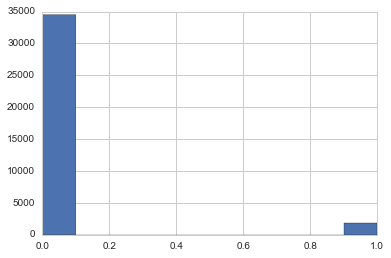

In [147]:
data2['host_is_superhost'].hist()

In [148]:
data2_1 = data2[data2['host_is_superhost']==1]
data2_2 = data2[data2['host_is_superhost']==0].sample(len(data2_1))

data3 = pd.concat([data2_1, data2_2])

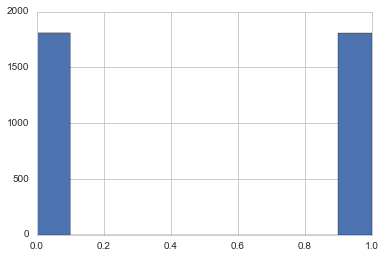

In [149]:
data3['host_is_superhost'].hist()

In [150]:
from sklearn import ensemble

# Set X and y
X = data3[features]
y = data3[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=100, class_weight="balanced", min_samples_leaf=10)
# rf = ensemble.RandomForestClassifier(n_estimators=10)

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [151]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

# Evaluate ROC AUC score of model on test set
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

Accuracy: 0.845
Accuracy: 0.804
ROC AUC: 0.883


In [152]:
from sklearn import ensemble

# Set X and y
X = data3[features]
y = data3[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

# updated model
rf = ensemble.RandomForestClassifier(n_estimators=100, class_weight="balanced", max_depth=10, min_samples_leaf=3)
# rf = ensemble.RandomForestClassifier(n_estimators=10)

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

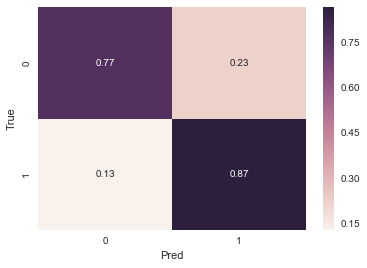

Confusion Matrix:
[[544 159]
 [ 98 647]]


In [153]:
# Get confusion matrix on test set
y_pred = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

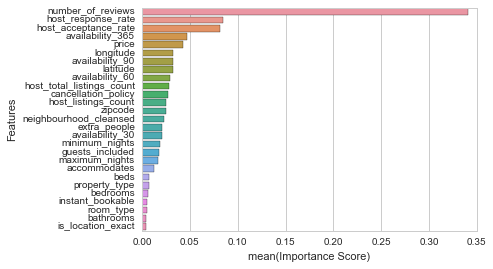

In [154]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

In [155]:
print "i'm done"

i'm done
